In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [4]:
np.random.seed(0)

In [13]:
n_pts = 10

random_x1_values = np.random.normal(10,2,n_pts)
random_x2_values = np.random.normal(12,2,n_pts)

random_x1_values.mean(),random_x2_values.mean(),random_x1_values.shape,random_x2_values.shape

(8.8362867304651, 11.755029176703582, (10,), (10,))

In [14]:
top_region = np.array([random_x1_values,random_x2_values])
top_region.shape

(2, 10)

In [15]:
random_x1_values,random_x2_values

(array([ 8.6550791 ,  9.28089368,  8.37370744,  6.5474348 , 10.35485228,
         9.19643813,  6.73960331, 10.92556451,  8.18540327, 10.10389079]),
 array([13.45818112, 12.25796582, 14.27880137,  9.53034836, 12.80468328,
        10.63037982, 10.2584057 , 10.84230067, 11.37689494, 12.11233068]))

In [16]:
top_region = top_region.T
top_region

array([[ 8.6550791 , 13.45818112],
       [ 9.28089368, 12.25796582],
       [ 8.37370744, 14.27880137],
       [ 6.5474348 ,  9.53034836],
       [10.35485228, 12.80468328],
       [ 9.19643813, 10.63037982],
       [ 6.73960331, 10.2584057 ],
       [10.92556451, 10.84230067],
       [ 8.18540327, 11.37689494],
       [10.10389079, 12.11233068]])

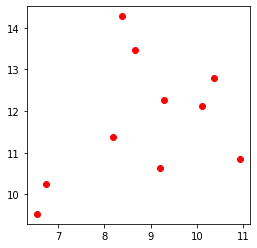

In [17]:
_, ax = plt.subplots(figsize = (4,4))

ax.scatter(top_region[:,0], top_region[:,1], color = "r")
plt.show()

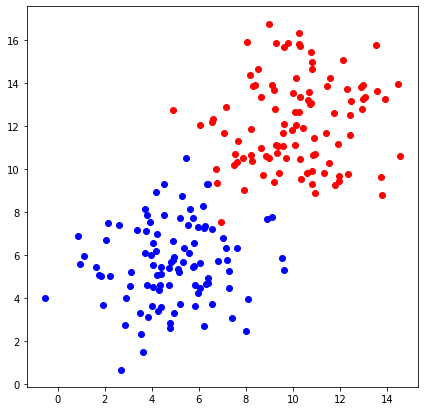

In [19]:
n_pts = 100

np.random.seed(0)

top_region = np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts)]).T
bottom_region = np.array([np.random.normal(5,2,n_pts), np.random.normal(6,2,n_pts)]).T

_, ax = plt.subplots(figsize = (7,7))

ax.scatter(top_region[:, 0 ], top_region[:, 1] , color = "r")
ax.scatter(bottom_region[:, 0 ], bottom_region[:, 1], color = "b")

plt.show()

In [21]:
def draw(x1,x2):
    ln = plt.plot(x1,x2,"-")

    #Bunları normalde sublimeText çalıştırırsan kullan

    plt.pause(0.0001)
    ln[0].remove()

def sigmoid(score):

    return 1 / (1 + np.exp(-score))

def calculate_error(line_parameters, points, y):


    m = points.shape[0]
    p = sigmoid(points * line_parameters)
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameters, points, y, alpha):

    m = points.shape[0]

    for i in range(500):

        p = sigmoid(points * line_parameters)
        gradient = (points.T * (p-y))*(alpha / m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)

        x1 = np.array([points[:,0].min(), points[:,1].max()])
        x2 = -b / w2 + x1 * (-w1/w2)

        # Bunları normalde sublime Text çalıştırırsan kullan
        #print(calculate_error(line_parameters, points, y))
        # draw(x1,x2)

    draw(x1,x2)

In [30]:
n_pts = 100
np.random.seed(0)

bias = np.ones(n_pts)

top_region = np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region = np.array([np.random.normal(5,2,n_pts), np.random.normal(6,2,n_pts), bias]).T

all_points = np.vstack((top_region, bottom_region))
#print(all_points.shape) # (200,3)

#w1 = -0.1 # -0.2
#w2 =  -0.15 #-0.35
#b = 0 #3.5

#line_parameters = np.matrix([w1,w2,b]).T
line_parameters = np.matrix([np.zeros(3)]).T
#print(line_parameters.shape) # (3,1)

#x1 = np.array([bottom_region[:,0].min(), top_region[:,0].max()])
#x2 = -b /w2 + x1 * (-w1/w2)

#print(x1,x2)
#print(all_points.shape)
#print(line_parameters.shape)

linear_combination = all_points * line_parameters
#print(linear_combination.shape) # (200,1)

prob = sigmoid(linear_combination)

y = np.array([np.zeros(n_pts),np.ones(n_pts)]).reshape(n_pts*2,1)
#y.shape #(200,1)

In [31]:
calculate_error(line_parameters,all_points,y)

matrix([[0.69314718]])

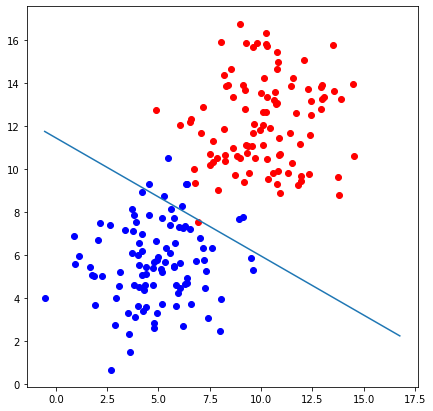

In [32]:
_,ax = plt.subplots(figsize = (7,7))
ax.scatter(top_region[:, 0], top_region[:, 1] ,color = "r")
ax.scatter(bottom_region[:, 0], bottom_region[:, 1] ,color = "b")
#draw(x1,x2)
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()